<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ingest" data-toc-modified-id="Ingest-1">Ingest</a></span></li><li><span><a href="#Inspect-and-Clean" data-toc-modified-id="Inspect-and-Clean-2">Inspect and Clean</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Looking-for-duplicates" data-toc-modified-id="Looking-for-duplicates-2.0.1">Looking for duplicates</a></span></li><li><span><a href="#Change-datatypes" data-toc-modified-id="Change-datatypes-2.0.2">Change datatypes</a></span></li><li><span><a href="#Change-column-names" data-toc-modified-id="Change-column-names-2.0.3">Change column names</a></span></li><li><span><a href="#Manage-missing-data" data-toc-modified-id="Manage-missing-data-2.0.4">Manage missing data</a></span></li><li><span><a href="#Imputing-missing-values" data-toc-modified-id="Imputing-missing-values-2.0.5">Imputing missing values</a></span></li></ul></li><li><span><a href="#Check-categorical-data" data-toc-modified-id="Check-categorical-data-2.1">Check categorical data</a></span><ul class="toc-item"><li><span><a href="#Using-visuals-to-get-a-sense-of-the-data" data-toc-modified-id="Using-visuals-to-get-a-sense-of-the-data-2.1.1">Using visuals to get a sense of the data</a></span><ul class="toc-item"><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-2.1.1.1">Categorical data</a></span></li></ul></li><li><span><a href="#Examine-categorical-data-a-little-more-closely" data-toc-modified-id="Examine-categorical-data-a-little-more-closely-2.1.2">Examine categorical data a little more closely</a></span></li><li><span><a href="#Dropping-columns-and-rows" data-toc-modified-id="Dropping-columns-and-rows-2.1.3">Dropping columns and rows</a></span><ul class="toc-item"><li><span><a href="#Quantitative-data" data-toc-modified-id="Quantitative-data-2.1.3.1">Quantitative data</a></span></li></ul></li><li><span><a href="#Removing-outliers" data-toc-modified-id="Removing-outliers-2.1.4">Removing outliers</a></span></li></ul></li></ul></li><li><span><a href="#Exercise---30-minutes" data-toc-modified-id="Exercise---30-minutes-3">Exercise - 30 minutes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#See-Beer-Notebook---Part-1" data-toc-modified-id="See-Beer-Notebook---Part-1-3.0.1">See Beer Notebook - Part 1</a></span></li></ul></li></ul></li></ul></div>

# Ingest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df_original = pd.read_csv('https://raw.githubusercontent.com/jimcody2014/python_data/refs/heads/main/diabetes_inspect.csv')
df_original.head()

In [ ]:
# A cursory look at the data
df_original.shape

In [ ]:
df = df_original
df.shape

# Inspect and Clean

### Looking for duplicates

In [ ]:
# checking for duplicates
df.loc[df.duplicated()]# This will drop all duplicate rows

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True) 

# keep - which duplicate to keep, default is none!

df.loc[df.duplicated()]

### Change datatypes

In [ ]:
# Are we ok with the data types?
df.info()

In [ ]:
# Change data type

df['encounter_id'] = df['encounter_id'].astype(str)
df['patient_nbr'] = df['patient_nbr'].astype(str)
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df.info()

# vaccines['series_complete_pop_pct'] = pd.to_numeric(vaccines['series_complete_pop_pct']).astype(int)


### The 'inplace' parameter

This is a decision about making a new object (and using more memory) or creating a new object that holds the modified data.

- inplace=True  - - changes the object (e.g., dataframe) you are working on (Example 1)
- inplace=False - - the change is discarded (Example 2) unless the change is written to a new object (Example 3)

In [ ]:
# Example 1

data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df9 = pd.DataFrame(data)

# Drop a column using inplace=True
df9.drop(columns=['Age'], inplace=True)
print('df9 with inplace = True', df9)

In [ ]:
df9

In [ ]:
# Example 2 - change discarded

data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df9 = pd.DataFrame(data)

# Drop a column using inplace=False
df9.drop(columns=['Age'], inplace=False)
print('df9 with inplace = False', df9)

In [ ]:
df9

In [ ]:
# Example 3

data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df9 = pd.DataFrame(data)

# Drop a column using inplace=False
new_df9 = df9.drop(columns=['Age'], inplace=False)
print('original', df9)
print('new', new_df9)




### Use inplace=False + Reassignment
- Readability: It makes it clear that the method creates and returns a new object.
- Chaining Operations: You can chain multiple methods together (e.g., df = df.method1().method2()).
- Debugging: The original object remains intact unless explicitly reassigned, making debugging easier.

### Advantages and Caution:
Advantages:
- Using inplace=True can save memory because it avoids creating a new object.
Caution:
- When you use inplace=True, you lose the ability to chain methods since no object is returned.
- Overusing inplace=True can make debugging more difficult because the original object is modified directly, which might lead to unexpected results.
  
**In modern practices, many developers prefer not to use inplace=True for better code readability and to maintain immutability where possible.**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna



### Change column names

In [ ]:
# Rename a few columns

short_names = {'admission_type_id':'admin_type', # creating a dict of the names to be changed
               'discharge_disposition_id':'discharge_dispo',
               'admission_source_id':'admin_source',
               'num_lab_procedures':'lab_procedures',
               'num_procedures':'procedures'}

df.rename(columns=short_names, inplace=True) # passing the dict to the rename method
 

df.info()

### Manage missing data

In [ ]:
# Just listing the columns and how many rows 
# for each have a missing value.

df.isnull().sum()

In [ ]:
# Calculate the percentage of null values for each column
df_null = df.isna().mean().round(4) * 100

df_null

In [ ]:
df_null.sort_values(ascending=False).head()

In [ ]:
# Plotting missing values

sns.heatmap(df.isnull(), cbar=False)

### Imputing missing values

In [ ]:
a = df['num_medications'].describe()
b = df['num_medications'].median()
c = df['num_medications'].mode()
print(a)
print()
print(f'The median is {b}')
print()
print(f'The mode is {c}')

In [ ]:
# Fill missing values of num_medications with the average of num_medications (mean)

#df[ 'num_medications' ] = df.num_medications.fillna( df.num_medications.mean() )

df.num_medications.fillna( df.num_medications.mean(),inplace=True )

df_null = df.isna().mean().round(4) * 100
df_null.sort_values(ascending=False).head()

# Can be filled with an arbitrary number
# df.num_medications.fillna( 101,inplace=True )

# backward, forward ->  df.fillna(method='bfill') , df.fillna(method='ffill')

In [ ]:
df.head()

## Check categorical data

In [ ]:
sns.countplot(x='gender', data=df)

In [ ]:
df['gender'].nunique()

In [ ]:
df['gender'].unique()

In [ ]:
df['gender'].value_counts()

In [ ]:

df['weight'] = df['weight'].replace('?', pd.NA)
df.isnull().sum()

In [ ]:
df.loc[df.gender == 'M','gender']='Male'
df.head()

In [ ]:
# Change/Fix some of the data values

df['gender'] = df['gender'].replace({'M':'Male', 'Mle':'Male', 'F':'Female'})
#df.head()

In [ ]:
# Inconsistent capitalization
# Apply a function along an axis of the DataFrame.

df['gender'] = df['gender'].apply(lambda x:x.lower())
df.head()

In [ ]:
sns.countplot(x='gender', data=df)

In [ ]:
x = df.loc[df.gender == 'unknown/invalid','gender']
y = df.loc[df.gender == '?','gender']
print(x)
print(y)

In [ ]:
df.iloc[11]

In [ ]:
df['gender'] = df['gender'].replace({'?':'NaN', 'unknown/invalid':'male'})
df.head()

In [ ]:
# Change a value for an entire column
#df.loc[:,'discharge_dispo'] = 99   
#df.loc[64410] = 99   # Change a value for an entire row
#df.head()


### Using visuals to get a sense of the data

In [ ]:
df.info()

#### Categorical data

In [ ]:
# Create a bar chart for each categorical variables to see the distribution of the data
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.countplot(x="race", data=df)
plt.subplot(3,3,2)
sns.countplot(x="age", data=df)
plt.subplot(3,3,3)
sns.countplot(x="gender", data=df)
plt.subplot(3,3,4)
sns.countplot(x="admin_type", data=df)
plt.subplot(3,3,5)
sns.countplot(x="admin_source", data=df)
plt.subplot(3,3,6)
sns.countplot(x="discharge_dispo", data=df)
plt.subplot(3,3,7)
sns.countplot(x="medical_specialty", data=df)
plt.subplot(3,3,8)
sns.countplot(x="weight", data=df)
plt.subplot(3,3,9)
sns.countplot(x="payer_code", data=df)

plt.suptitle('Categorical Plotting')
plt.show()


In [ ]:
# Create a bar chart for each categorical variables to see the distribution of the data
plt.figure(figsize = (20,20))
plt.subplot(521)
sns.countplot(x="race", data=df)
plt.subplot(522)
sns.countplot(x="age", data=df)
plt.subplot(523)
sns.countplot(x="gender", data=df)
plt.subplot(524)
sns.countplot(x="admin_type", data=df)
plt.subplot(525)
sns.countplot(x="admin_source", data=df)
plt.subplot(526)
sns.countplot(x="discharge_dispo", data=df)
plt.subplot(527)
sns.countplot(x="medical_specialty", data=df)
plt.subplot(528)
sns.countplot(x="weight", data=df)
plt.subplot(529)
sns.countplot(x="payer_code", data=df)

plt.suptitle('Categorical Plotting')
plt.show()

### Examine categorical data a little more closely

In [ ]:
for column in df.columns:         # df.columns is a data frame attribute
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")
    
    
# f means Formatted string literals 

In [ ]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

In [ ]:
df['payer_code'].nunique()

In [ ]:
df['payer_code'].value_counts()

In [ ]:
df.loc[df['payer_code']!= 'MC']

In [ ]:
df['medical_specialty'].nunique()

In [ ]:
df['medical_specialty'].value_counts()

In [ ]:
df['weight'].nunique()

In [ ]:
df['weight'].value_counts()

### Dropping columns and rows

In [ ]:
df.shape

In [ ]:
df.weight

In [ ]:
# Remove a single column
df.drop('payer_code',axis=1, inplace=True)  # Axis=1 means drop the column
df.drop('weight',axis=1, inplace=True)  


In [ ]:
# Remove multiple columns

# glyburide-metformin       
# glipizide-metformin       
# glimepiride-pioglitazone

drop_columns = {'medical_specialty','glyburide-metformin','glipizide-metformin',
                'glimepiride-pioglitazone'}
df.drop(columns = drop_columns, inplace=True) # inplace=True not used so columns still exist. 
                                     # Just not in this instance.
df.head()

In [ ]:
# Delete by selecting rows not equal to the condition
df = df.loc[df['age']!= 'xyz']
df = df.loc[df.gender != '?']
#df = df.loc[df['gender']!='?']
#df.shape

In [ ]:
no_age = df[df['age'].isnull()].index
#no_age
df = df.drop(no_age, axis = 0)   # axis = 0 means drop the row
df.shape
               
              

#### Quantitative data

In [ ]:
# Histograms

plt.figure(figsize = (20,20))
plt.subplot(521)
sns.histplot(data=df, x='time_in_hospital', binwidth = 1)
plt.subplot(522)
sns.histplot(data=df, x='lab_procedures', bins=25)
plt.subplot(523)
sns.histplot(data=df, x='procedures', binwidth = 1)
plt.subplot(524)
sns.histplot(data=df, x='num_medications', binwidth = 2)
plt.subplot(525)
sns.histplot(data=df, x='number_outpatient', binwidth = 2)
plt.subplot(526)
sns.histplot(data=df, x='number_inpatient', binwidth = 2)
plt.subplot(527)
sns.histplot(data=df, x='number_emergency', binwidth = 2)


plt.suptitle('Histograms')
plt.show()

In [ ]:
# Pairplot to see the big picture
sns.pairplot(df)

In [ ]:
sns.pairplot(df, hue = 'gender', corner = True)

In [ ]:
sns.pairplot(df,
             x_vars=['lab_procedures', 'procedures', 'num_medications'],
             y_vars=['time_in_hospital','number_outpatient','number_emergency','number_inpatient' ])


In [58]:
# Correlations
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
df2 = numeric_df.corr()
df2

,time_in_hospital,lab_procedures,procedures,num_medications,number_outpatient,number_emergency,number_inpatient
time_in_hospital,1.000000,0.318456,0.191462,0.466121,-0.008921,-0.009684,0.073615
lab_procedures,0.318456,1.000000,0.058072,0.268152,-0.007600,-0.002278,0.039235
procedures,0.191462,0.058072,1.000000,0.385765,-0.024823,-0.038183,-0.066244
num_medications,0.466121,0.268152,0.385765,1.000000,0.045189,0.013175,0.064180
number_outpatient,-0.008921,-0.007600,-0.024823,0.045189,1.000000,0.091458,0.107335
number_emergency,-0.009684,-0.002278,-0.038183,0.013175,0.091458,1.000000,0.266558
number_inpatient,0.073615,0.039235,-0.066244,0.064180,0.107335,0.266558,1.000000


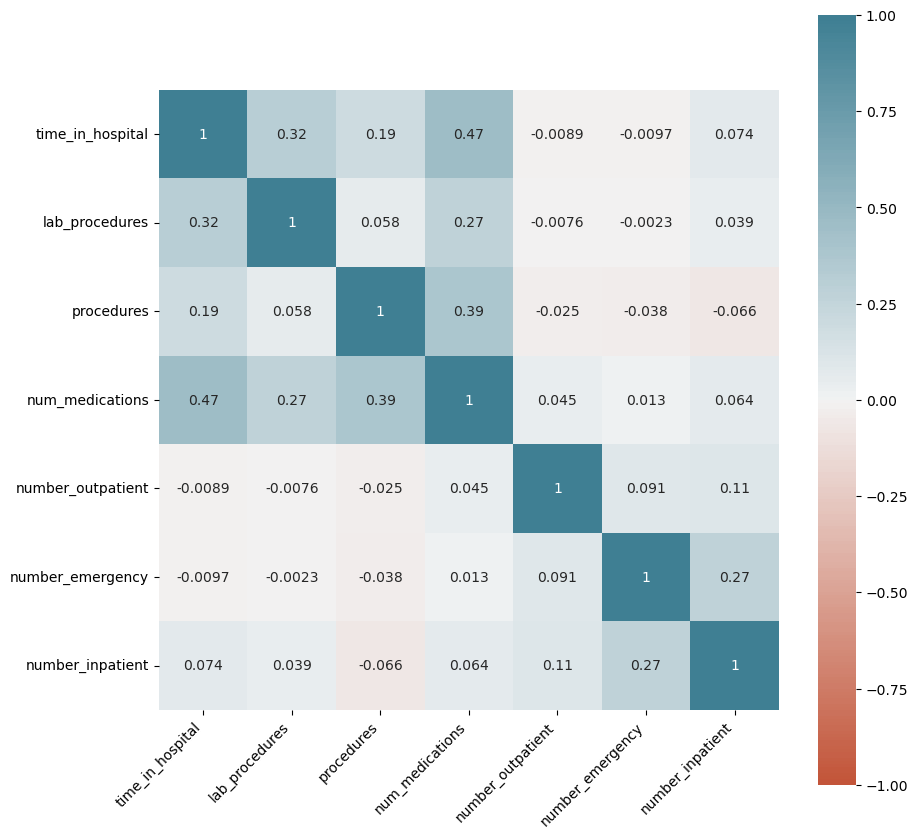

In [59]:
plt.figure(figsize=(10,10))
corr = df2.corr()
ax = sns.heatmap(
    df2,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size":10}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

<Axes: ylabel='num_medications'>

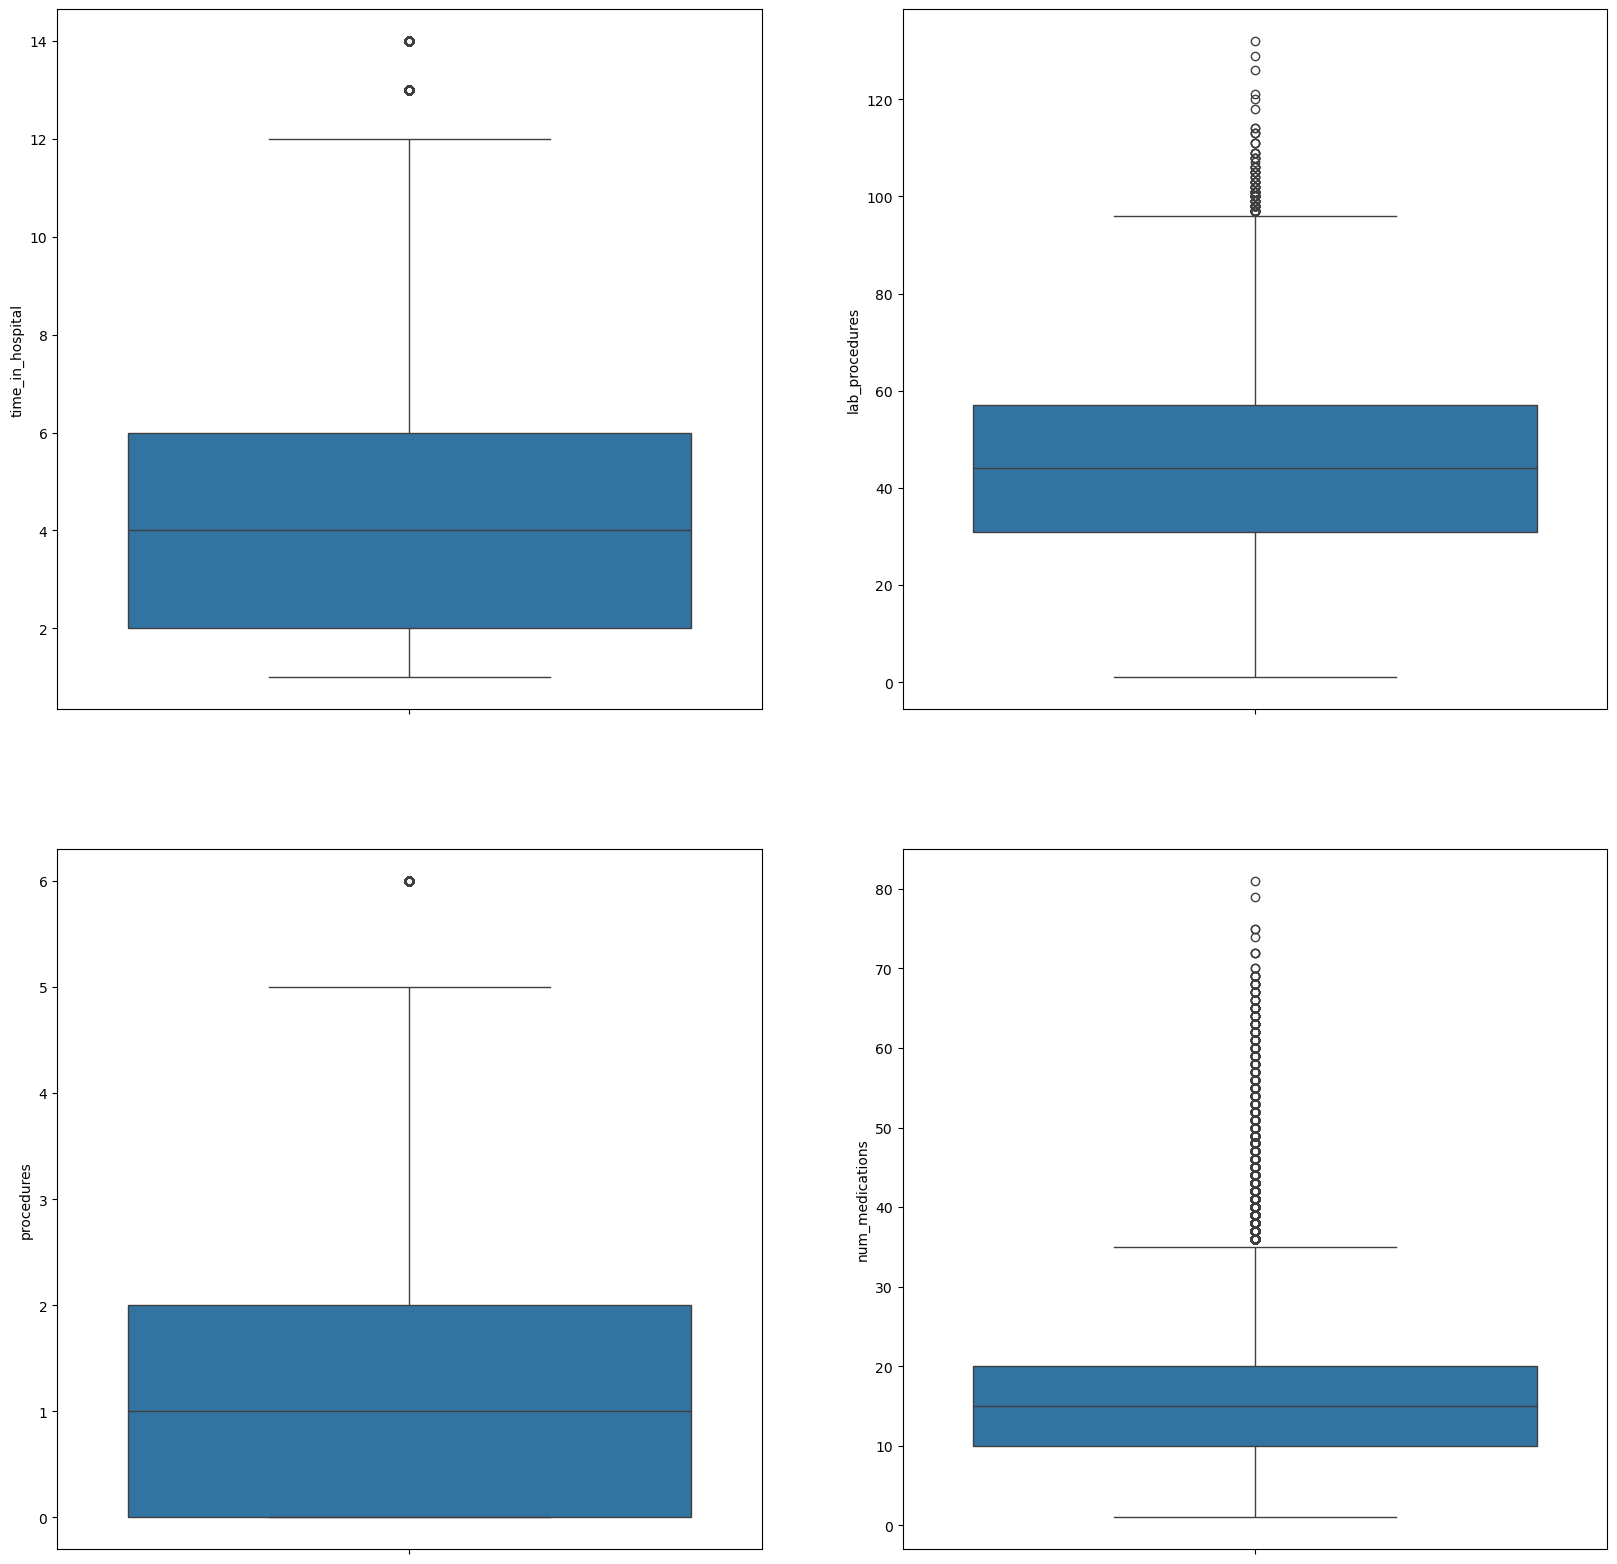

In [60]:
# Focusing on a few variables

plt.figure(figsize = (20,20))
plt.subplot(221)
sns.boxplot(data=df, y="time_in_hospital")
plt.subplot(222)
sns.boxplot(data=df, y="lab_procedures")
plt.subplot(223)
sns.boxplot(data=df, y="procedures")
plt.subplot(224)
sns.boxplot(data=df, y="num_medications")

<Axes: xlabel='age', ylabel='num_medications'>

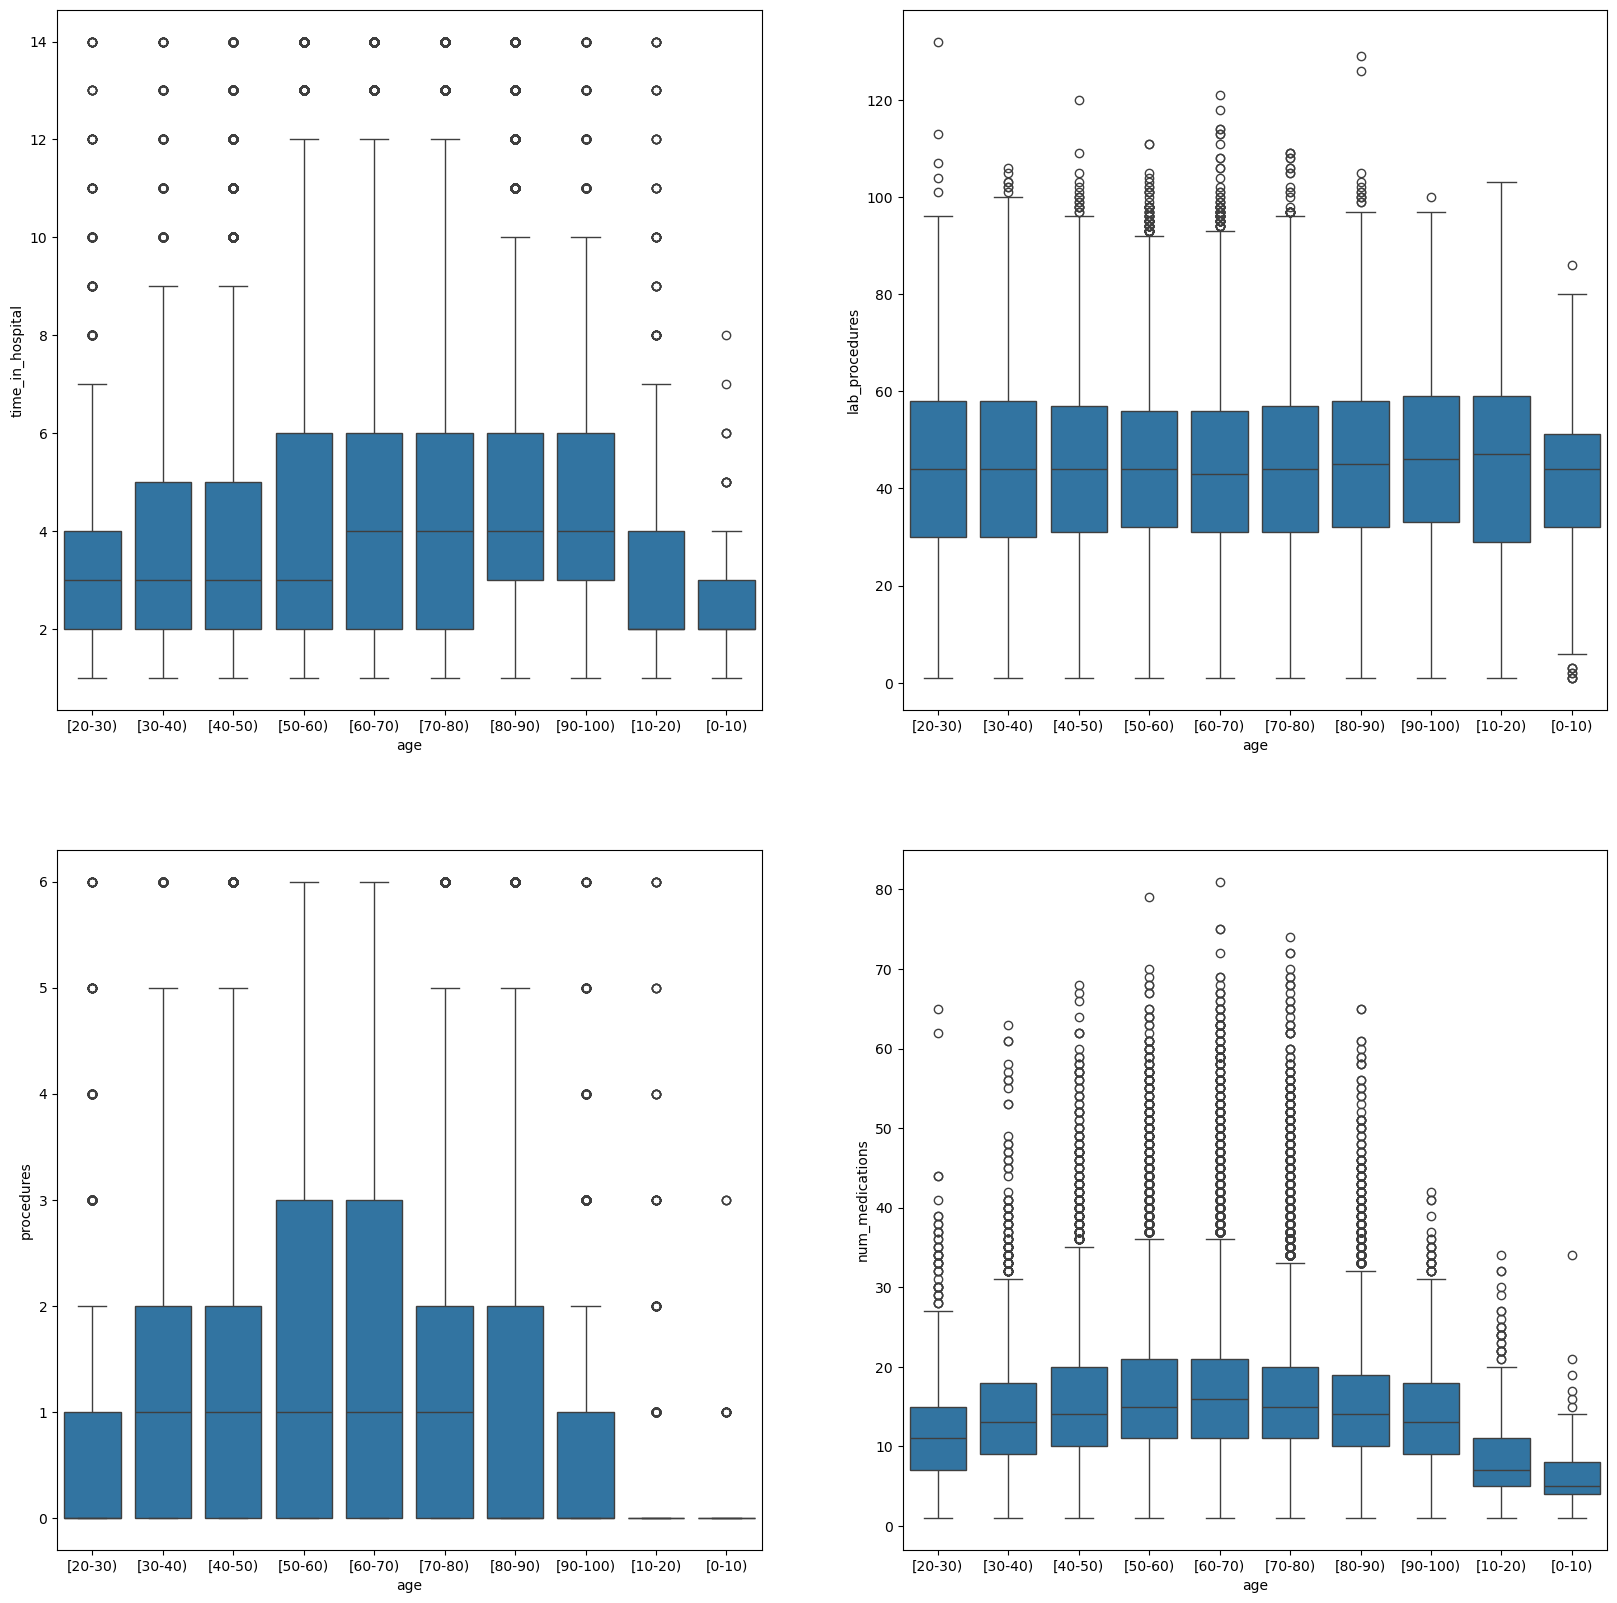

In [61]:
# Focusing on a few variables

plt.figure(figsize = (20,20))
plt.subplot(221)
sns.boxplot(data=df, x='age', y="time_in_hospital")
plt.subplot(222)
sns.boxplot(data=df, x='age', y="lab_procedures")
plt.subplot(223)
sns.boxplot(data=df, x='age', y="procedures")
plt.subplot(224)
sns.boxplot(data=df, x='age', y="num_medications")

### Removing outliers

In [62]:
#outliers
dfoutliers = df[(df['num_medications']>70)]
dfoutliers.shape
#filtering outliers out
#df_movie = df_movie[(df_movie['minute']>43) & (df_movie['minute']<158)]

(8, 27)

# Exercise - 30 minutes

### See Beer Notebook - Part 1